# Blackjack using AI



### We implement Q-Star algorithm and design a blackjack game enviornment to help our AI play the game.

We use very basic Python libraries for the project

In [ ]:
#Import Functions
import numpy as np
import random as r

## The Q-Table Class

The Q-Table is effectively the brain of the AI. It's a matrix that stores the appropriate actions that need to be taken when a given Scenario is presented to the AI.

The Q-Table has following data:
<br>**State:** State is a combination of Usable Ace \[0-1\] (discussed below), AI's Hand (Sum of the player's cards) \[2-21\], Dealer's Up Card \[1-10\] and below)
<br>**Action:** Action holds the success of a the move AI plays. *(Number of Succesfull attempts,Total attempts)*

Below is an example of how a Q-Table might look in the memory

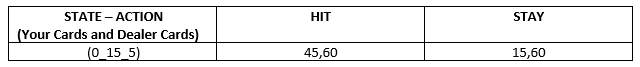

We start with our basic class definition for q_table

In [ ]:
class q_table:
    def __init__(self):
        self.hitcount= 1
        self.totalgame= 1
        self.ratio=self.hitcount/self.totalgame

Let's define a q-table structure. 
The qtable stores the values of the hitcount and the total games played seperated by a "_" for Hit and Stay Column.

There are a total of 484 combinations possible in our states. Hence we guve our numpy array a shape of (484,2)

In [ ]:
#The qtable stores the values of the hitcount and the total games played seperated by a "_" for Hit and Stay Column  
qtable=['0000000000_0000000000' for i in range(968)]
qtable=np.array(qtable)
qtable=(qtable.reshape(484,2))
print((qtable).shape)

We need to be able to cleverly extract information from our states, and since we cannot directly index (0_1_1) from numpy array, we map all the combinations of (0_0_0) to (1_21_10) with a number stored in our index list. 

Below is the code

In [ ]:
index=[]

def generate_index():
index=[]
for i in range(2):
    for j in range(11):
        for k in range(22):
            # We use strings to access states
            index_i_j_k = str(i)+"_"+str(j)+"_"+str(k)
            index.append(index_i_j_k)
return index

index=generate_index()

Now that we have our Q-table defined. Let's write a code to update the Q-Table as the AI plays the game. As explained above, we calculate the numeric index for our given state from Index list and update the values accordingly at that index in our numpy array.

We have a **row_index** variable that essentially holds the 'State' of the Game and a **col_index** variable which checks which action was taken.

In [ ]:
# The update_qtable updates the q_table with Action taken (Hit or stay), Dealer's card and player's card.
def update_qtable(action, dealer_cards, player_cards, usable_ace, result, obj_qtable):
    qtable=obj_qtable.qtable
    
    # Result variable shows whether the given move was a 'Win' or a 'Lose'.
    print(result)
    
    # Here we simply output the state of the game.
    print("function called, Action decided: {} Dealer Cards: {} Player Cards: {} Result: {} "
          .format(action, dealer_cards[0], player_cards, result))
    
    # Based on the action assign the column to be read.
    if action=='Hit':
        col_index=0
    else:
        col_index=1
    
    # We create a temporary game object to access necessary functions.
    tempgame = game()
    print(tempgame.sum_cards(player_cards))
    
    # As defined above, we store the state in row_index variable.
    row_index = obj_qtable.index.index(str(usable_ace)+"_"+str(dealer_cards[0])+"_"+str(tempgame.sum_cards(player_cards)))
    print(row_index)
    
    # We extract the q_value from the table
    q_value=qtable[row_index,col_index]
    
    # We split the elements on an '_' and update the counts based on the result.
    if(result=='Win'):
        counts=(q_value.split("_"))
        counts[0]=int(counts[0])+1
        counts[1]=int(counts[1])+1

    else:
        counts=(q_value.split("_"))
        counts[1]=int(counts[1])+1
    
    # Reformat the updated values
    q_value=str(counts[0])+'_'+str(counts[1])
    
    # We return the updated values back to the table
    qtable[row_index,col_index]=q_value

AI Action is a function we use to chose what AI should do based on the q-values.

Like above, it first extracts the values from q-table and then takes the action based on the percentage of winning.

In [ ]:
# The ai_action is made for the AI player to take actions once it has learned sufficient number of times to take further actions
def ai_action(dealer_cards,player_cards,usable_ace,obj_qtable):
    tempgame = game()
    qtable=obj_qtable.qtable
    row_index = obj_qtable.index.index(str(usable_ace)+"_"+str(dealer_cards[0])+"_"+str(tempgame.sum_cards(player_cards)))
    q_value=qtable[row_index,0]

    counts=(q_value.split("_"))
    
    # This conditions states whether it should hit or stay
    if (int(counts[1])==0 or int(counts[0])/int(counts[1]) > 0.5):
        return 'Hit'
    else:
        return 'Stay'

## Blackjack Game Enviornment
Let's start with the Blackjack game enviornment.

#### Game Enviornment 
Blackjack has following elements in it's simplest form.
<br>The **deck** of cards.
<br>**Player's** Hand.
<br>**Dealer's** Hand.
<br>We Initialize these things as our class objects.

In [ ]:
class game:
    def __init__(self):
        self.dealer_cards = []
        self.player_cards = []
        self.deck = []

#### The Deck

A deck is simply **52** cards or 'numbers' having a value from **1-10** and then **3** Face cards (K,Q,J) for **4** Houses.<br> But since the value for face cards in blackjack is 10. We simulate a deck procedurely using a for loop.

In [ ]:
# Random card generator which generates card from 1 to 13, taking the count of face cards as 10
def card_generator(self,deck):  
    for i in range(4):
        for j in range(1,14):
            if(j>=10):
                self.deck.append(10)
            else:
                self.deck.append(j)
    # We shuffle the cards, hence making our deck 'Shuffled' and ready to use.
    r.shuffle(self.deck)

Now we define some simple card operatoins like Reset the deck and draw cards

In [ ]:
# Resets the deck and calls the card generator function
def reset_deck(self,deck):  
    self.card_generator(self.deck)

Now, if there are very few cards left, we risk a chance of player's being able to count cards. Hence we reset th deck after a certain amount of cards are left.

In [ ]:
# Draws card from the deck and also checks the cards in deck, if it goes below 7 it resets the deck
# We simulate a draw with the list.pop() function, which mimics taking the last card out from the deck.
def draw_card(self,deck):  
    if(len(deck)<=7):
        deck = self.reset_deck(self.deck)
    return self.deck.pop()

Deal Cards function deals the 2 cards each to player and the AI

In [ ]:
def deal_cards(self,deck):  # 2 Dealer and 2 player cards are drawn
    self.dealer_cards.append(self.draw_card(self.deck))
    self.dealer_cards.append(self.draw_card(self.deck))
    self.player_cards.append(self.draw_card(self.deck))
    self.player_cards.append(self.draw_card(self.deck))

#### Usable Ace

Blackjack has a rule where the ace can take a value of 1 or 11. This is purely upto the player, hence we need our AI to be able to decide the same. Hence usable_ace function returns 'True' if the ace has the value of 11, and 'False' if the ace has the value of 1.

In [ ]:
def usable_ace(self,player_cards):  # Checks, does this hand have a usable ace?
    if(1 in (self.player_cards) and sum(self.player_cards) + 10 <= 21):
        return 1
    else:
        return 0

Let's look at some other functions essential to the game.
<br>**sum_cards()**: Returns the sum of the value of the cards, possessed by the entity.
<br>**is_bust()**: Checks for a Blackjack bust. If sum > 21, it is called Bust.
<br>**hit()**: Hit occurs when the player asks for a card.
<br>**stay()**: When player decides to stay with his cards.
<br>**dealer_hit()**: Simulates the dealer's actions after the player's moves are over.

In [ ]:
def sum_cards(self,cards):  # Returns the current hand total
    if self.usable_ace(cards):
        return sum(cards) + 10
    else:
        return sum(cards)

In [ ]:
def is_bust(self,cards):  # Checks, if this hand is a bust?
    return self.sum_cards(cards) > 21

In [ ]:
def hit(self,player_cards,deck,dealer_cards, qtable):  # Checks if the hand is a bust and draws a card for the player
    self.player_cards.append(self.draw_card(self.deck))
    if(len(player_cards)<=2):
        continue:
    else:
        if (not self.is_bust(self.player_cards)):
            # Q-Table is updated with the action and the result of the game.
            q_table.update_qtable('Hit', self.dealer_cards, self.player_cards[:-1], self.usable_ace(self.player_cards), 'Win', qtable)
    else:
        # Q-Table is updated with the action and the result of the game.
        q_table.update_qtable('Hit', self.dealer_cards, self.player_cards[:-1], self.usable_ace(self.player_cards), 'Lose', qtable)

In [ ]:
def stay(self,player_cards,deck,dealer_cards,qtable):  
    # When player stays, the dealer checks its sum and ends the game if it is greater than the player   
    if(self.sum_cards(self.dealer_cards)>self.sum_cards(self.player_cards)):
        q_table.update_qtable('Stay', self.dealer_cards, self.player_cards, self.usable_ace(self.player_cards), 'Lose', qtable)
        print(self.sum_cards(self.dealer_cards),self.sum_cards(self.player_cards))
        
    # If the dealer's sum is less than 22 and less than the player, it will hit    
    else:
        while(self.sum_cards(self.dealer_cards)<22 and self.sum_cards(self.dealer_cards)<self.sum_cards(self.player_cards)): #This condition checks the dealer cards when the AI player has opted to stay, it checks if the sum of dealer's cards <22 and if its total is less than dealer's sum, the dealer will hit.
            self.dealer_hit(self.player_cards,deck,self.dealer_cards)
            print("Dealer Cards",self.dealer_cards,self.player_cards)
            print("Player Cards",self.sum_cards(self.dealer_cards),self.sum_cards(self.player_cards))
            if(self.is_bust(self.dealer_cards)): # If dealer busts, we update in the q table as a win for us
                # Q-Table is updated with the action and the result of the game.
                q_table.update_qtable('Stay', self.dealer_cards, self.player_cards, self.usable_ace(self.player_cards), 'Win', qtable)
            else:
                # Q-Table is updated with the action and the result of the game.
                q_table.update_qtable('Stay', self.dealer_cards, self.player_cards, self.usable_ace(self.player_cards), 'Lose', qtable)
            

In [ ]:
# Checks if the dealer hits the card then is it getting bust, if not it hits the card

def dealer_hit(self,player_cards,deck,dealer_cards):  
    if not self.is_bust(self.dealer_cards):
        self.dealer_cards.append(self.draw_card(self.deck))
    else:
        print("Burst! Game over")

Now we initialize the Blackjack game here and use epsilon to train the AI. 

In [ ]:
class Blackjack:
    epsilon=1 # We would use a decrementing rate from 1 to 0 for epsilon and run atleast 10000 training episodes so that the player has explored atleast sufficient conditions for it to run on itself
    training_episodes=training_episodes_left=10000
    small_decrement = (0.1 * epsilon) / (0.5 * training_episodes) # reduces epsilon slowly
    big_decrement = (0.3 * epsilon) / (0.6 * training_episodes)

    game1=game()
    game1.card_generator(game1.deck)
    game1.deal_cards(game1.deck)


    print(game1.deck)#prints the deck of the game initially
    print("Dealer Cards",game1.dealer_cards)
    print("Player Cards",game1.player_cards)

    qtable = q_table()

      """ while not game1.is_bust(game1.player_cards):
        game1.hit(game1.player_cards,game1.deck,game1.dealer_cards, qtable)
        print("Player Cards",game1.player_cards)
        print("Player Pre hit Cards",game1.player_cards[:-1]) """

    while(epsilon>=0): # The AI player would be exploring the environment until it has explored sufficient conditions
        game1.player_cards.clear()
        game1.dealer_cards.clear()
        game1.card_generator(game1.deck)
        game1.deal_cards(game1.deck)

        while not game1.is_bust(game1.player_cards):
            game1.hit(game1.player_cards,game1.deck,game1.dealer_cards, qtable)

        if training_episodes_left > 0.7 * training_episodes_left:#If the training episodes are greater than 0.70 it will have a small decrement
            epsilon -= small_decrement
        elif training_episodes_left > 0.3 * training_episodes_left:#If the training episodes are greater than 0.30 it will have a bigger decrement
            epsilon -= big_decrement
        elif training_episodes_left > 0:
            epsilon -= small_decrement
        else:
            epsilon = 0.0

        training_episodes_left -= 1
        print("Epsilon:",epsilon, "Training Episodes:",training_episodes_left)



    print("-------------------------------------------------------------------------")

    print("Training Q Table")
    print(qtable.qtable)



    for i in range(1000): #For initial 1000 games, the AI player would just hit to get the estimates for q table and update the q table, this is randomly chosen
        game1.player_cards.clear()
        game1.dealer_cards.clear()
        game1.card_generator(game1.deck)
        game1.deal_cards(game1.deck)
        while not game1.is_bust(game1.player_cards):
            action=q_table.ai_action(game1.dealer_cards,game1.player_cards,game1.usable_ace(game1.player_cards),qtable)

            if(action=='Hit'):
                game1.hit(game1.player_cards,game1.deck,game1.dealer_cards, qtable)
                print("AI Hits")
            else:
                game1.stay(game1.player_cards,game1.deck,game1.dealer_cards, qtable)
                print("AI Stays")
                break
    
    print("Testing Q Table")
    print(qtable.qtable)  

# THE ENTIRE CODE 

In [1]:
#Import Functions

import numpy as np
import random as r

class q_table:
  def __init__(self):
    self.hitcount= 1
    self.totalgame= 1
    self.ratio=self.hitcount/self.totalgame
  
  index=[]
  
  def generate_index():
    index=[]
    for i in range(2):
      for j in range(11):
        for k in range(22):
          index_i_j_k = str(i)+"_"+str(j)+"_"+str(k)
          index.append(index_i_j_k)
    return index
  
  index=generate_index()
  
  #The qtable stores the values of the hitcount and the total games played seperated by a "_" for Hit and Stay Column  
  qtable=['0000000000_0000000000' for i in range(968)]
  qtable=np.array(qtable)
  qtable=(qtable.reshape(484,2))
  print((qtable).shape)
  
  
 
  # The update_qtable updates the q_table with Action taken (Hit or stay), Dealer's card and player's card.
  def update_qtable(action, dealer_cards, player_cards, usable_ace, result, obj_qtable):
    qtable=obj_qtable.qtable
    print(result)
    print("function called, Action decided: {} Dealer Cards: {} Player Cards: {} Result: {} ".format(action, dealer_cards[0], player_cards, result))
    if action=='Hit':
      col_index=0
    else:
      col_index=1
    
    tempgame = game()
    
    print(tempgame.sum_cards(player_cards))
    row_index = obj_qtable.index.index(str(usable_ace)+"_"+str(dealer_cards[0])+"_"+str(tempgame.sum_cards(player_cards)))# Calling tempgame for the Q table in the format (Usable ace (0 or 1), dealers cards and players cards)
    
    print(row_index)
    
    print("Before")
    #print(qtable[row_index,col_index])
    q_value=qtable[row_index,col_index]
    print(q_value)
    
    if(result=='Win'):
      counts=(q_value.split("_"))
      counts[0]=int(counts[0])+1
      counts[1]=int(counts[1])+1

    else:
      counts=(q_value.split("_"))
      counts[1]=int(counts[1])+1
      
    q_value=str(counts[0])+'_'+str(counts[1])
    
    print("After")
    print(q_value)
    qtable[row_index,col_index]=q_value
    

    
      
# The ai_action is made for the AI player to take actions once it has learned sufficient number of times to take further actions
  def ai_action(dealer_cards,player_cards,usable_ace,obj_qtable):
    tempgame = game()
    qtable=obj_qtable.qtable
    row_index = obj_qtable.index.index(str(usable_ace)+"_"+str(dealer_cards[0])+"_"+str(tempgame.sum_cards(player_cards)))
    q_value=qtable[row_index,0]

    counts=(q_value.split("_"))
    
    
    #q_value_stay=qtable[row_index,1]
    # This conditions states whether it should hit or stay
    if (int(counts[1])==0 or int(counts[0])/int(counts[1]) > 0.5):
      return 'Hit'
    else:
      return 'Stay'


class game:
  def __init__(self):
    self.dealer_cards = []
    self.player_cards = []
    self.deck = []
    # self.game_result = win/lose
    #q_table1=q_table()
  
    # Random card generator which generates card from 1 to 13, taking the count of face cards as 10
  def card_generator(self,deck):  
    for i in range(4):
      for j in range(1,14):
        if(j>=10):
          self.deck.append(10)
        else:
          self.deck.append(j)
    r.shuffle(self.deck)
  
  def reset_deck(self,deck):  # Resets the deck and calls the card generator function
    self.card_generator(self.deck)
  
  def draw_card(self,deck):  # draws card from the deck and also checks the cards in deck, if it goes below 7 it resets the deck
    if(len(deck)<=7):
      deck = self.reset_deck(self.deck)
    return self.deck.pop()
  
  def deal_cards(self,deck):  # 2 Dealer and 2 player cards are drawn
    self.dealer_cards.append(self.draw_card(self.deck))
    self.dealer_cards.append(self.draw_card(self.deck))
    self.player_cards.append(self.draw_card(self.deck))
    self.player_cards.append(self.draw_card(self.deck))
    
  def usable_ace(self,player_cards):  # Checks, does this hand have a usable ace?
    if(1 in (self.player_cards) and sum(self.player_cards) + 10 <= 21):
      return 1
    else:
      return 0
  
  def sum_cards(self,cards):  # Returns the current hand total
      if self.usable_ace(cards):
          return sum(cards) + 10
      else:
        return sum(cards)
  
  def is_bust(self,cards):  # Checks, if this hand is a bust?
    return self.sum_cards(cards) > 21
  
  def hit(self,player_cards,deck,dealer_cards, qtable):  # Checks if the hand is a bust and draws a card for the player
    self.player_cards.append(self.draw_card(self.deck))
    if(len(player_cards)<=2):
      tmp=0
    else:
      if (not self.is_bust(self.player_cards)):
        q_table.update_qtable('Hit', self.dealer_cards, self.player_cards[:-1], self.usable_ace(self.player_cards), 'Win', qtable)
      else:
        q_table.update_qtable('Hit', self.dealer_cards, self.player_cards[:-1], self.usable_ace(self.player_cards), 'Lose', qtable)
      
  def dealer_hit(self,player_cards,deck,dealer_cards):  # Checks if the dealer hits the card then is it getting bust, if not it hits the card
    if not self.is_bust(self.dealer_cards):
      self.dealer_cards.append(self.draw_card(self.deck))
    else:
      print("Burst! Game over")
         
  def stay(self,player_cards,deck,dealer_cards,qtable):  # When player stays, the dealer checks its sum and ends the game if it is greater than the player
                                                  # If the dealer's sum is less than 22 and less than the player, it will hit    
    if(self.sum_cards(self.dealer_cards)>self.sum_cards(self.player_cards)):
        q_table.update_qtable('Stay', self.dealer_cards, self.player_cards, self.usable_ace(self.player_cards), 'Lose', qtable)
        print(self.sum_cards(self.dealer_cards),self.sum_cards(self.player_cards))
    else:
      while(self.sum_cards(self.dealer_cards)<22 and self.sum_cards(self.dealer_cards)<self.sum_cards(self.player_cards)): #This condition checks the dealer cards when the AI player has opted to stay, it checks if the sum of dealer's cards <22 and if its total is less than dealer's sum, the dealer will hit.
        self.dealer_hit(self.player_cards,deck,self.dealer_cards)
        print("Dealer Cards",self.dealer_cards,self.player_cards)
        print("Player Cards",self.sum_cards(self.dealer_cards),self.sum_cards(self.player_cards))
      if(self.is_bust(self.dealer_cards)): # If dealer busts, we update in the q table as a win for us
        q_table.update_qtable('Stay', self.dealer_cards, self.player_cards, self.usable_ace(self.player_cards), 'Win', qtable)
      else:
        q_table.update_qtable('Stay', self.dealer_cards, self.player_cards, self.usable_ace(self.player_cards), 'Lose', qtable)
            
            
class Blackjack:
  epsilon=1 # We would use a decrementing rate from 1 to 0 for epsilon and run atleast 10000 training episodes so that the player has explored atleast sufficient conditions for it to run on itself
  training_episodes=training_episodes_left=10000
  small_decrement = (0.1 * epsilon) / (0.5 * training_episodes) # reduces epsilon slowly
  big_decrement = (0.3 * epsilon) / (0.6 * training_episodes)
  
  game1=game()
  game1.card_generator(game1.deck)
  game1.deal_cards(game1.deck)
  
  
  print(game1.deck)#prints the deck of the game initially
  print("Dealer Cards",game1.dealer_cards)
  print("Player Cards",game1.player_cards)
  #print("Player Pre hit Cards",game1.player_cards[:-1])

  qtable = q_table()
 
  """ while not game1.is_bust(game1.player_cards):
    game1.hit(game1.player_cards,game1.deck,game1.dealer_cards, qtable)
    print("Player Cards",game1.player_cards)
    print("Player Pre hit Cards",game1.player_cards[:-1]) """

  while(epsilon>=0): # The AI player would be exploring the environment until it has explored sufficient conditions
    game1.player_cards.clear()
    game1.dealer_cards.clear()
    game1.card_generator(game1.deck)
    game1.deal_cards(game1.deck)

    while not game1.is_bust(game1.player_cards):
      game1.hit(game1.player_cards,game1.deck,game1.dealer_cards, qtable)
    
    if training_episodes_left > 0.7 * training_episodes_left:#If the training episodes are greater than 0.70 it will have a small decrement
      epsilon -= small_decrement
    elif training_episodes_left > 0.3 * training_episodes_left:#If the training episodes are greater than 0.30 it will have a bigger decrement
      epsilon -= big_decrement
    elif training_episodes_left > 0:
      epsilon -= small_decrement
    else:
      epsilon = 0.0
      
    training_episodes_left -= 1
    print("Epsilon:",epsilon, "Training Episodes:",training_episodes_left)
    
  
  for i in range(100): #This is break line which divides the system into training and testing, and shows two differen value.
    print("-------------------------------------------------------------------------")
    
  print("Training Q Table")
  print(qtable.qtable)
  
  
  
  for i in range(1000): #For initial 1000 games, the AI player would just hit to get the estimates for q table and update the q table, this is randomly chosen
    game1.player_cards.clear()
    game1.dealer_cards.clear()
    game1.card_generator(game1.deck)
    game1.deal_cards(game1.deck)
    while not game1.is_bust(game1.player_cards):
        action=q_table.ai_action(game1.dealer_cards,game1.player_cards,game1.usable_ace(game1.player_cards),qtable)
    
      if(action=='Hit'):
        game1.hit(game1.player_cards,game1.deck,game1.dealer_cards, qtable)
        print("AI Hits")
      else:
        game1.stay(game1.player_cards,game1.deck,game1.dealer_cards, qtable)
        print("AI Stays")
        break

  print("Testing Q Table")    
  print(qtable.qtable)
  

(484, 2)
[2, 3, 10, 10, 5, 9, 6, 8, 1, 10, 10, 10, 1, 8, 10, 10, 9, 7, 9, 2, 5, 3, 10, 3, 7, 5, 3, 7, 4, 6, 7, 4, 10, 10, 4, 10, 4, 2, 8, 1, 2, 6, 8, 10, 5, 1, 10, 10]
Dealer Cards [10, 10]
Player Cards [9, 6]
Lose
function called, Action decided: Hit Dealer Cards: 2 Player Cards: [7, 10] Result: Lose 
17
61
Before
0000000000_0000000000
After
0000000000_1
Epsilon: 0.99998 Training Episodes: 9999
Win
function called, Action decided: Hit Dealer Cards: 1 Player Cards: [10, 10] Result: Win 
20
42
Before
0000000000_0000000000
After
1_1
Lose
function called, Action decided: Hit Dealer Cards: 1 Player Cards: [10, 10, 1] Result: Lose 
21
43
Before
0000000000_0000000000
After
0000000000_1
Epsilon: 0.99996 Training Episodes: 9998
Win
function called, Action decided: Hit Dealer Cards: 9 Player Cards: [7, 3] Result: Win 
10
208
Before
0000000000_0000000000
After
1_1
Lose
function called, Action decided: Hit Dealer Cards: 9 Player Cards: [7, 3, 10] Result: Lose 
20
218
Before
0000000000_0000000000


KeyboardInterrupt: 

### References:

<a href=https://en.wikipedia.org/wiki/Blackjack>BlackJack Wiki</a> <br>
<a href=https://hollygrimm.com/rl_mc>Reinforcement Learning</a> <br>
<a href=https://github.com/openai/gym/blob/master/gym/envs/toy_text/blackjack.py>Github Link for Source of insipiration</a><br>
<a href=https://en.wikipedia.org/wiki/Q-learning>Q Learning Wiki</a> <br>